<span style="color:#6495ED; font-size:2.5em">Problem Statmenet</span>

<strong>Given:</strong> The given dataset contains attributes ( information ) extracted from vocal samples of patients recordings of patients,  since Parkinson’s Disease is characterised by impact on speech of a patient

<strong>To Do:</strong> In this notebook, we will explore and build various ML model to idetify the best model to predict if a patitent might have of the disease. This model would be an effective screening step prior to an appointment with a clinician.

<span style="color:#6495ED; font-size:2em">Importing Essential Libraries for This Exercise</span>

In [275]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

<span style="color:#6495ED; font-size:2em">Importing the data the given CSV file</span>

In [276]:
cdata = pd.read_csv("Data - Parkinsons")

<span style="color:#6495ED; font-size:2em">Exploratory Data Analysis</span><br>
Answer to the question: Using univariate & bivariate analysis to check the individual attributes for their basic statistics such as central values, spread, tails, relationships between variables etc. mention your observations
<br>
And 
<br>
It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of records, structure of the file, number of attributes,types of attributes and a general idea of likely challenges in the dataset. Mention a few comments in this regard

In [277]:
cdata.shape

(195, 24)

<strong>Observation:</strong> The data contain 195 rows ( observtions ) with 24 columns. One of these columns will be the target variable, while the others are the feature set.

In [278]:
cdata.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

<strong>Observation:</strong> 
<ul>
    <li>The target variable is the column with the title "status"</li>
    <li>The name column does not add any value, hence it can be dropped</li>
</ul>

<span style="color:#6495ED; font-size:2em">Checking the distribution of positive and negative values in the data set</span> 

In [279]:
count_values = cdata.groupby('status')['name'].nunique()
print(count_values)

status
0     48
1    147
Name: name, dtype: int64


<strong>Observation:</strong> 
<ul>
    <li>There are significantly more number of positive values than negative values</li>
    <li>Since we are build this model as a precursor actual diagnosis of non-leathal disease, its good that there is a positive bias in the data </li>
    <li>Having said that, we need to identify a model that performs well for both positive and negative values</li>
</ul>

In [280]:
cdata.describe().transpose()

count        mean        std         min         25%  \
MDVP:Fo(Hz)       195.0  154.228641  41.390065   88.333000  117.572000   
MDVP:Fhi(Hz)      195.0  197.104918  91.491548  102.145000  134.862500   
MDVP:Flo(Hz)      195.0  116.324631  43.521413   65.476000   84.291000   
MDVP:Jitter(%)    195.0    0.006220   0.004848    0.001680    0.003460   
MDVP:Jitter(Abs)  195.0    0.000044   0.000035    0.000007    0.000020   
MDVP:RAP          195.0    0.003306   0.002968    0.000680    0.001660   
MDVP:PPQ          195.0    0.003446   0.002759    0.000920    0.001860   
Jitter:DDP        195.0    0.009920   0.008903    0.002040    0.004985   
MDVP:Shimmer      195.0    0.029709   0.018857    0.009540    0.016505   
MDVP:Shimmer(dB)  195.0    0.282251   0.194877    0.085000    0.148500   
Shimmer:APQ3      195.0    0.015664   0.010153    0.004550    0.008245   
Shimmer:APQ5      195.0    0.017878   0.012024    0.005700    0.009580   
MDVP:APQ          195.0    0.024081   0.016947    0.007190    0.013080   
Shimmer:DDA       195.0    0.046993   0.030459    0.013640    0.024735   
NHR               195.0    0.024847   0.040418    0.000650    0.005925   
HNR               195.0   21.885974   4.425764    8.441000   19.198000   
status            195.0    0.753846   0.431878    0.000000    1.000000   
RPDE              195.0    0.498536   0.103942    0.256570    0.421306   
DFA               195.0    0.718099   0.055336    0.574282    0.674758   
spread1           195.0   -5.684397   1.090208   -7.964984   -6.450096   
spread2           195.0    0.226510   0.083406    0.006274    0.174351   
D2                195.0    2.381826   0.382799    1.423287    2.099125   
PPE               195.0    0.206552   0.090119    0.044539    0.137451   

                         50%         75%         max  
MDVP:Fo(Hz)       148.790000  182.769000  260.105000  
MDVP:Fhi(Hz)      175.829000  224.205500  592.030000  
MDVP:Flo(Hz)      104.315000  140.018500  239.170000  
MDVP:Jitter(%)      0.004940    0.007365    0.033160  
MDVP:Jitter(Abs)    0.000030    0.000060    0.000260  
MDVP:RAP            0.002500    0.003835    0.021440  
MDVP:PPQ            0.002690    0.003955    0.019580  
Jitter:DDP          0.007490    0.011505    0.064330  
MDVP:Shimmer        0.022970    0.037885    0.119080  
MDVP:Shimmer(dB)    0.221000    0.350000    1.302000  
Shimmer:APQ3        0.012790    0.020265    0.056470  
Shimmer:APQ5        0.013470    0.022380    0.079400  
MDVP:APQ            0.018260    0.029400    0.137780  
Shimmer:DDA         0.038360    0.060795    0.169420  
NHR                 0.011660    0.025640    0.314820  
HNR                22.085000   25.075500   33.047000  
status              1.000000    1.000000    1.000000  
RPDE                0.495954    0.587562    0.685151  
DFA                 0.722254    0.761881    0.825288  
spread1            -5.720868   -5.046192   -2.434031  
spread2             0.218885    0.279234    0.450493  
D2                  2.361532    2.636456    3.671155  
PPE                 0.194052    0.252980    0.527367

<strong>Observation:</strong> 
<ul>
    <li>There are no missing values in any of the columns</li>
    <li>There are significant variations on the various features' max and min values - A z-transformation is needed to build a good models</li>
</ul>

<span style="color:#6495ED; font-size:2em">Feature Corelation Analysis</span>

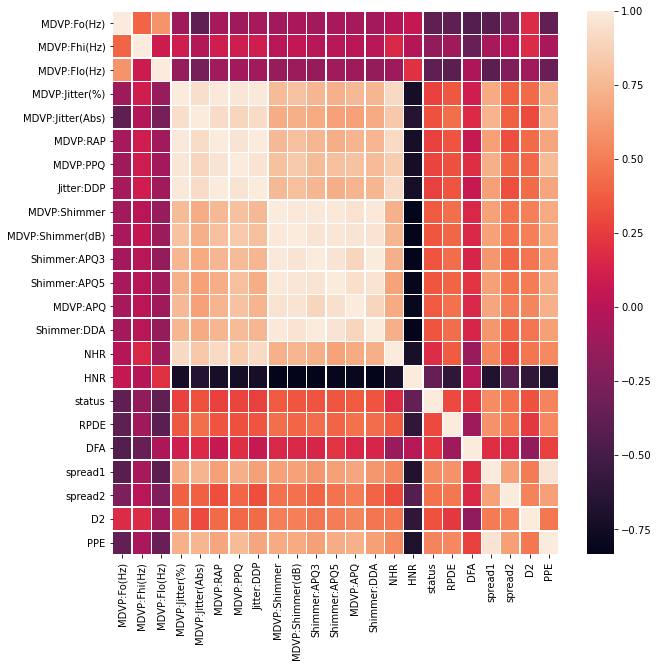

In [281]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cdata.corr(), linewidths=.5, ax=ax)

<strong>Observation:</strong> 
<ul>
    <li>There are distinct co-relations amoungst the various "Shimmer" features - These can possiblly be combined or some of these features can be dropped</li>
    <li>There are distinct co-relations amoungst the various "MDVP-Jitter" features - These can possiblly be combined or some of these features can be dropped</li>
    <li>The other features have relaatively lesser corelation - therefore can be retained</li>
     <li>The status ( target variable ) does not have string co-relations with any other feature</li
</ul>

In [282]:
cdata.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

<strong>Observation:</strong> 
<ul>
    <li>All the data types for the features is either int64 or float64 - which does not require any change</li>
    <li>Since we are dropping the "name" feature, it does not require a data transformation</li>
    <li>Status os the target variable</li>
</ul>

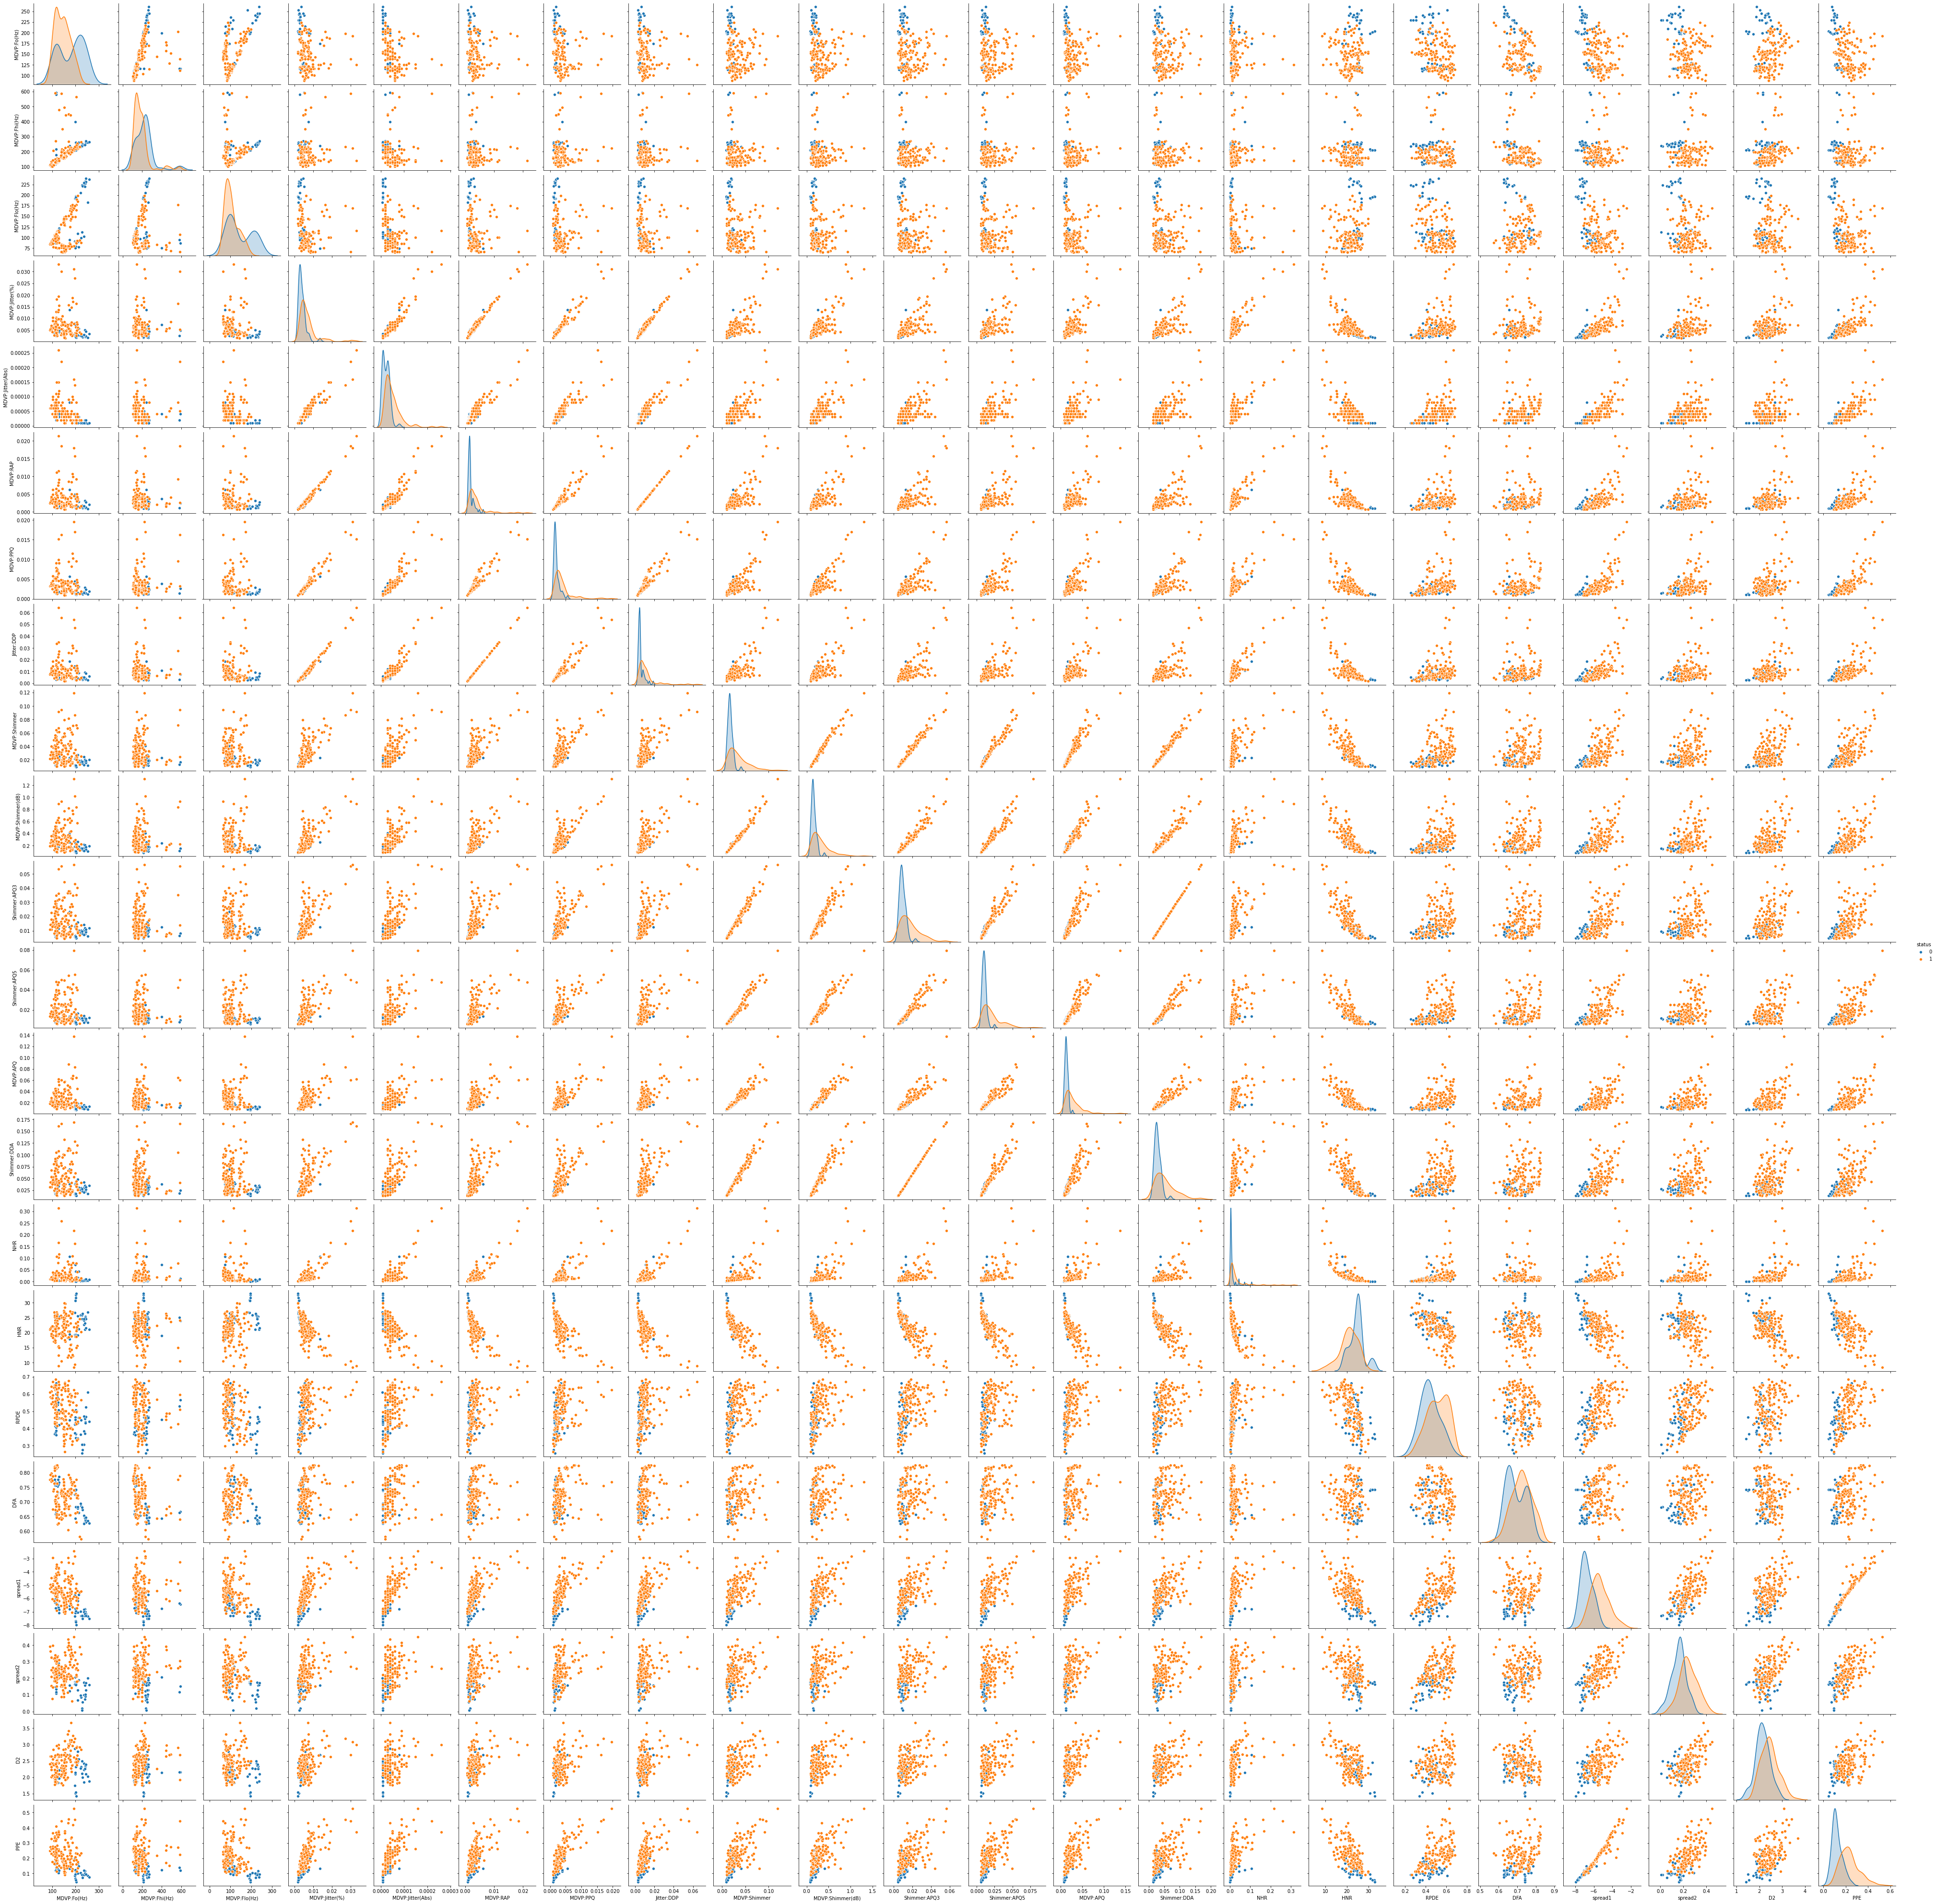

In [283]:
sns.pairplot(cdata, hue="status")

<strong>Observation:</strong> 
<ul>
    <li>Simlar to the co-relation matrix, the "jitter" and "Shimmer" features are highly co-related</li>
    <li>Most of the other data seem to have a left skew. But since we are working on mostly non-parametric models, it should not be an issue</li>
    <li>Based on a visual, it seems like the positive and the negative values are forming seperate clusters for each feature</li>
</ul>

<span style="color:#6495ED; font-size:2em">Checking for Null Values</span> 

In [284]:
cdata.isnull().any()

name                False
MDVP:Fo(Hz)         False
MDVP:Fhi(Hz)        False
MDVP:Flo(Hz)        False
MDVP:Jitter(%)      False
MDVP:Jitter(Abs)    False
MDVP:RAP            False
MDVP:PPQ            False
Jitter:DDP          False
MDVP:Shimmer        False
MDVP:Shimmer(dB)    False
Shimmer:APQ3        False
Shimmer:APQ5        False
MDVP:APQ            False
Shimmer:DDA         False
NHR                 False
HNR                 False
status              False
RPDE                False
DFA                 False
spread1             False
spread2             False
D2                  False
PPE                 False
dtype: bool

<strong>Observation:</strong> 
<ul>
    <li>There are no null values </li>
</ul>

<span style="color:#6495ED; font-size:2em">EDA Overview</span> 

<strong>Anaysis</strong> 
<ul>
    <li>The target variable is <strong>"status"</strong></li>
    <li>The "name" feature can be dropped</li>
    <li>The set of features that represent "shimmer" and "jitter" needs to be consolidated</li>
    <li>The features have to normalised to get optimal results</li>
</ul>

<span style="color:#6495ED; font-size:2em">Data Pre-Processing</span> <br>
Answer to the Question: Prepare the data for training - Scale the data if necessary, get rid of missing values 

<span style="color:#6495ED; font-size:1.5em">Dropping the "name" feature</span> 

In [285]:
cdata = cdata.drop('name',axis='columns')

<span style="color:#6495ED; font-size:1.5em">Unifying the features highly co-related to "shimmer" </span> 

In [286]:
cdata = cdata.assign(shimmer_consolidated = lambda x: cdata["MDVP:Shimmer"]*cdata["MDVP:Shimmer(dB)"]*cdata["Shimmer:APQ3"]*cdata["Shimmer:APQ5"]*cdata["MDVP:APQ"]*cdata["Shimmer:DDA"])

In [287]:
cdata = cdata.drop(["MDVP:Shimmer","MDVP:Shimmer(dB)","Shimmer:APQ3","Shimmer:APQ5","MDVP:APQ","Shimmer:DDA"],axis=1)

<span style="color:#6495ED; font-size:1.5em">Unifying the features highly co-related to "Jitter"</span>  

In [288]:
cdata = cdata.assign(jitter_consolidated = lambda x: cdata["MDVP:Jitter(%)"]*cdata["MDVP:Jitter(Abs)"]*cdata["MDVP:RAP"]*cdata["MDVP:PPQ"]*cdata["Jitter:DDP"])

In [289]:
cdata = cdata.drop(["MDVP:Jitter(%)","MDVP:Jitter(Abs)","MDVP:RAP","MDVP:PPQ","Jitter:DDP"],axis=1)

In [290]:
cdata.shape #Checking the shape to see the columns have been removed

(195, 14)

In [291]:
cdata.head()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)      NHR     HNR  status      RPDE  \
0      119.992       157.302        74.997  0.02211  21.033       1  0.414783   
1      122.400       148.650       113.819  0.01929  19.085       1  0.458359   
2      116.682       131.111       111.555  0.01309  20.651       1  0.429895   
3      116.676       137.871       111.366  0.01353  20.644       1  0.434969   
4      116.014       141.781       110.655  0.01767  19.649       1  0.417356   

        DFA   spread1   spread2        D2       PPE  shimmer_consolidated  \
0  0.815285 -4.813031  0.266482  2.301442  0.284654          2.474570e-08   
1  0.819521 -4.075192  0.335590  2.486855  0.368674          2.233122e-07   
2  0.825288 -4.443179  0.311173  2.342259  0.332634          7.965201e-08   
3  0.819235 -4.117501  0.334147  2.405554  0.368975          1.100074e-07   
4  0.823484 -3.747787  0.234513  2.332180  0.410335          2.953771e-07   

   jitter_consolidated  
0         1.247548e-13  
1         3.493738e-13  
2         6.556438e-13  
3         4.731875e-13  
4         1.651461e-12

<strong>Note</strong> 
<ul>
    <li>The "jitter" and "shimmer" sets of features that had high co-relation have been unified</li>
</ul>

In [292]:
cdata.dtypes

MDVP:Fo(Hz)             float64
MDVP:Fhi(Hz)            float64
MDVP:Flo(Hz)            float64
NHR                     float64
HNR                     float64
status                    int64
RPDE                    float64
DFA                     float64
spread1                 float64
spread2                 float64
D2                      float64
PPE                     float64
shimmer_consolidated    float64
jitter_consolidated     float64
dtype: object

<span style="color:#6495ED; font-size:1.5em">Dropping Unwanted Features </span> 

In [293]:
x = cdata.drop('status', axis=1) # Assigning all the other columns to x

In [294]:
y = cdata["status"] # Assigning the target variable to y

<span style="color:#6495ED; font-size:1.5em">Scaling of the Features</span>

In [295]:
from scipy.stats import zscore # z score transformation 
XS = x.apply(zscore)

<span style="color:#6495ED; font-size:1.5em">Splitting The Test and Train Data</span><br>
Answer to the question: Split the dataset into training and test set in the ratio of 70:30

In [296]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(XS, y, test_size=0.30, random_state=42)

<span style="color:#6495ED; font-size:1.5em">Checking if the data split is correct </span>

In [297]:
x_train.shape 

(136, 13)

In [298]:
x_test.shape

(59, 13)

<span style="color:#6495ED; font-size:2em">Classification Models Implementaiotn for the Problem Statement</span><br>
Answer to the question:  Trainatleast3standardclassificationalgorithms-LogisticRegression,Naive Bayes’, SVM, k-NN etc, and note down their accuracies on the test data

<span style="color:#6495ED; font-size:2em">Logistic Regression</span>

<span style="color:#6495ED; font-size:1.5em">Importing Libraries for Logistic Regression</span>

In [299]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

<span style="color:#6495ED; font-size:1.5em">Running the Model</span>

In [300]:
LogisticModel = LogisticRegression(solver="liblinear") # Configuring the Logistic Model 
LogisticModel.fit(x_train, y_train)
y_predict_LReg = LogisticModel.predict(x_test) #predict on test

<span style="color:#6495ED; font-size:1.5em">Performance Analysis & Scores</span>

In [301]:
print("Classification Report")
print(metrics.classification_report(y_test, y_predict_LReg, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.87      0.93      0.90        44
           0       0.75      0.60      0.67        15

    accuracy                           0.85        59
   macro avg       0.81      0.77      0.78        59
weighted avg       0.84      0.85      0.84        59



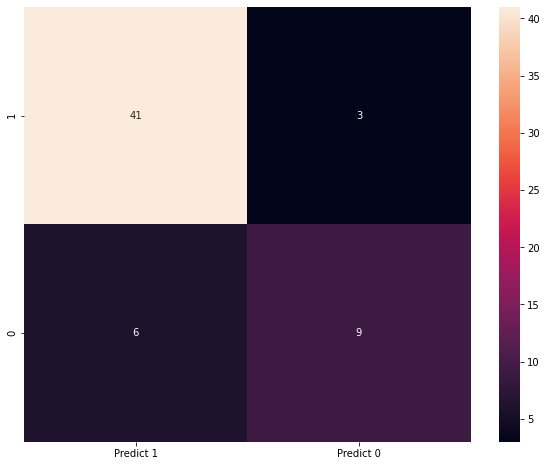

In [302]:
cm_LReg=metrics.confusion_matrix(y_test, y_predict_LReg, labels=[1, 0])

df_LReg = pd.DataFrame(cm_LReg, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (10,8))
sns.heatmap(df_LReg, annot=True)

<strong>Observations:</strong> 
<ul>
    <li>The model has a reasonable accuracy score of .85</li>
    <li>The precision, recall, and accuracy for the positive classifications ( "1")  are good with significant support</li>
    <li>he precision, recall, and accuracy for the negative classifications ( "0")  are not satisfactory</li>
    <li>Specially the recall and hence the F1 score are low for negative predictions ( "0" ) </li>
    
 <Strong>Conclusion: </Strong> <span style="color:green; font-size:1em">In Contention </span>

<span style="color:#6495ED; font-size:2em">Gaussian Naive Bayes </span>

<span style="color:#6495ED; font-size:1.5em">Importing the Libraries for Gaussian Naive Bayes Model and Running the model</span>

In [303]:
from sklearn.naive_bayes import GaussianNB
GNBModel = GaussianNB()
GNBModel.fit(x_train, y_train)

GaussianNB()

<span style="color:#6495ED; font-size:1.5em">Performance Analysis & Scores </span>

In [304]:
y_predict_GNB = GNBModel.predict(x_test)

print("Classification Report")
print(metrics.classification_report(y_test, y_predict_GNB, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.92      0.75      0.83        44
           0       0.52      0.80      0.63        15

    accuracy                           0.76        59
   macro avg       0.72      0.78      0.73        59
weighted avg       0.82      0.76      0.78        59



<span style="color:#6495ED; font-size:1.5em">Confusion Matrix</span>

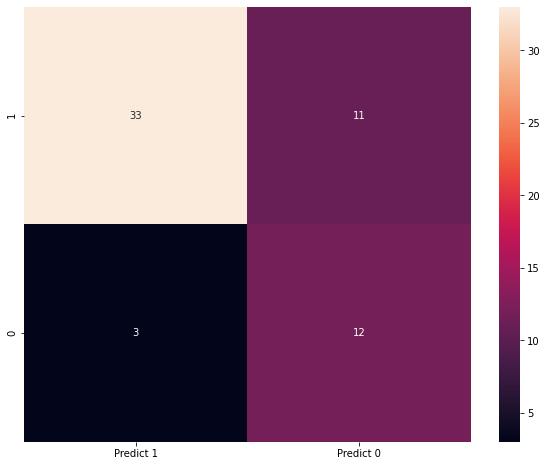

In [305]:
cm_GNB=metrics.confusion_matrix(y_test, y_predict_GNB, labels=[1, 0])

df_GNB = pd.DataFrame(cm_GNB, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (10,8))
sns.heatmap(df_GNB, annot=True)

<strong>Observations:</strong> 
<ul>
    <li>The model has a reasonable accuracy score of .76, but is lesser than the Logistic Regression Model</li>
    <li>The precision, recall, and accuracy for the positive classifications ( "1")  are good with significant support, although they are lower than logistic Regression</li>
    <li>he precision, recall, and accuracy for the negative classifications ( "0")  are very poor</li>
    <li>The model is rejected because the performance for negative classfications are very poor</li>
    
 <Strong>Conclusion: </Strong> <span style="color:red; font-size:1em">Rejected </span>

<span style="color:#6495ED; font-size:2em">KNN Model </span>

<span style="color:#6495ED; font-size:1.5em">Importing the Libraries for KNN Model</span>



In [306]:
from sklearn.neighbors import KNeighborsClassifier

<span style="color:#6495ED; font-size:1.5em">Chosing the Optimal K Value</span>

In [307]:
scores =[]
for k in range(1,50):
    KNN = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    KNN.fit(x_train, y_train)
    scores.append(KNN.score(x_test, y_test))

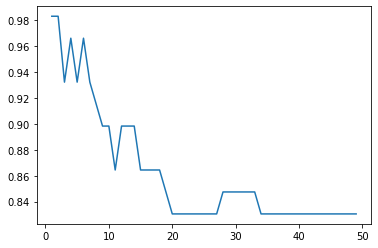

In [308]:
plt.plot(range(1,50),scores)

<strong>Note:</strong> 
<ul>
    <li>The scores are plauting at k - 12</li>
    <li>The model reaches the minimum score at less than .84</li>
    <li>The value cannot go lower, since there is a bias in the number of "1" positive data sets</li>

<span style="color:#6495ED; font-size:1.5em">Running the KNN Model with K = 18</span>

In [309]:
KNN = KNeighborsClassifier(n_neighbors= 12 , weights = 'distance' )
KNN.fit(x_train, y_train)
y_predict_KNN = KNN.predict(x_test)

<span style="color:#6495ED; font-size:1.5em">Performance Analysis & Scores</span>

In [310]:
print("Classification Report")
print(metrics.classification_report(y_test, y_predict_KNN, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.88      1.00      0.94        44
           0       1.00      0.60      0.75        15

    accuracy                           0.90        59
   macro avg       0.94      0.80      0.84        59
weighted avg       0.91      0.90      0.89        59



<span style="color:#6495ED; font-size:1.5em">Confusion Matrix</span>

Confusion Matrix


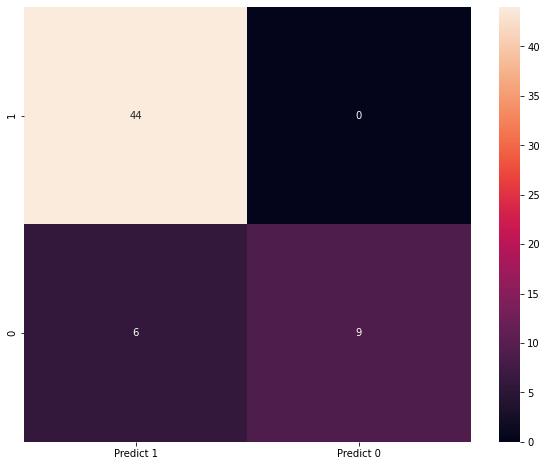

In [311]:
print("Confusion Matrix")
cm_KNN = metrics.confusion_matrix(y_test, y_predict_KNN, labels=[1, 0])

df_KNN = pd.DataFrame(cm_KNN, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (10,8))
sns.heatmap(df_KNN, annot=True)

<strong>Observations:</strong> 
<ul>
    <li> The model has an excellent accuracy score of .90 </li>
    <li>The model is performing well for positive predictions as well as negative predictions, in terms of precision, accuracy and recall </li>
    <li>The recall of negative predictions ( "0" ), is lower than satisfactory</li>
    
 <Strong>Conclusion: </Strong> <span style="color:green; font-size:1em">In Contention </span>

<span style="color:#6495ED; font-size:2em">Support Vector Machine Model</span>

<span style="color:#6495ED; font-size:1.5em">Importing the Libraries for the SVM Model </span>

In [312]:
from sklearn import svm

<span style="color:#6495ED; font-size:1.5em">Identifying the Optimal Value of gamma and C </span>

In [313]:
import math
max_score = 0
C_Final = 0
Gamma_Final = 0
score_temp = 0
for gam in range(-3,3):
    gam_temp = math.pow(10,gam)
    for Csel in range(-3,3):
        SVM_Model = svm.SVC(gamma=gam_temp, C=math.pow(10,Csel))
        SVM_Model.fit(x_train , y_train)
        score_temp = SVM_Model.score(x_train, y_train)
        if(score_temp > max_score):
            max_score = score_temp
            C_Final = Csel
            Gamma_Final = gam_temp

In [314]:
SVM_Model = svm.SVC(gamma=Gamma_Final, C=C_Final)
SVM_Model.fit(x_train , y_train)

SVC(C=2, gamma=0.1)

In [315]:
y_predict_SVM = SVM_Model.predict(x_test)

<span style="color:#6495ED; font-size:1.5em">Performance Analysis & Scores</span>

In [316]:
print("Classification Report")
print(metrics.classification_report(y_test, y_predict_SVM, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        44
           0       1.00      0.73      0.85        15

    accuracy                           0.93        59
   macro avg       0.96      0.87      0.90        59
weighted avg       0.94      0.93      0.93        59



<span style="color:#6495ED; font-size:1.5em">Confusion Matrix</span>

In [317]:
print("Confusion Matrix")
cm_SVM = metrics.confusion_matrix(y_test, y_predict_SVM, labels=[1, 0])

df_SVM = pd.DataFrame(cm_SVM, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (10,8))
sns.heatmap(df_SVM, annot=True)

Confusion Matrix


<strong>Observations:</strong> 
<ul>
    <li>The model has a good accuracy score of .93</li>
    <li>The performance for both positive and negative predictions are good, in terms of accuracy, precision and recall </li>
    
<Strong>Conclusion: </Strong> <span style="color:green; font-size:1em">IN CONTENTION</span>

<span style="color:#6495ED; font-size:2em">Meta Classifier</span><br>
Answer to the question: Train a meta-classifier and note the accuracy on test data

<span style="color:#6495ED; font-size:1.5em">Importing Essential Libraries and Running the Model</span>

In [318]:
from sklearn.ensemble import StackingClassifier
sclf = StackingClassifier([('lr',LogisticModel),('gnb',GNBModel),('kn',KNN),('sv', SVM_Model)])

In [319]:
sclf.fit(x_train,y_train)

StackingClassifier(estimators=[('lr', LogisticRegression(solver='liblinear')),
                               ('gnb', GaussianNB()),
                               ('kn',
                                KNeighborsClassifier(n_neighbors=12,
                                                     weights='distance')),
                               ('sv', SVC(C=2, gamma=0.1))])

In [320]:
y_predict_sclf = sclf.predict(x_test)

<span style="color:#6495ED; font-size:1.5em">Performance Analysis & Scores</span>

In [321]:
print("Classification Report")
print(metrics.classification_report(y_test, y_predict_sclf, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        44
           0       1.00      0.73      0.85        15

    accuracy                           0.93        59
   macro avg       0.96      0.87      0.90        59
weighted avg       0.94      0.93      0.93        59



<span style="color:#6495ED; font-size:1.5em">Confusion Matrix</span>

In [322]:
print("Confusion Matrix")
cm_sclf = metrics.confusion_matrix(y_test, y_predict_sclf, labels=[1, 0])

df_sclf = pd.DataFrame(cm_sclf, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (10,8))
sns.heatmap(df_sclf, annot=True)

Confusion Matrix


<strong>Observations:</strong> 
<ul>
    <li>The model performance is strikingly similar to SVM's predictions</li>
    <li>The model has a good accuracy score of .93</li>
    <li>The performance for both positive and negative predictions are good, in terms of accuracy, precision and recall </li>
    
<Strong>Conclusion: </Strong> <span style="color:green; font-size:1em">IN CONTENTION</span>

<span style="color:#6495ED; font-size:2em">Ensemble Methods</span><br>
Answer to the question - TrainatleastonestandardEnsemblemodel-Randomforest,Bagging, Boosting etc, and note the accuracy

<span style="color:#6495ED; font-size:1.5em">Importing Libraries for Standard Ensemble Classifier Models</span>

In [323]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

<span style="color:#6495ED; font-size:1.5em">Setting the Parameters for the Models</span> 

In [324]:
DecisionTree = DecisionTreeClassifier(random_state=42)   
Bagging = BaggingClassifier(random_state=1)
RandomForest = RandomForestClassifier(random_state=1, n_estimators=100,min_impurity_decrease=.015)  # specifying n_estimators to avoid "future warnings"
GradientBoosting = GradientBoostingClassifier(random_state=1, n_estimators=100,learning_rate=0.01)

<span style="color:#6495ED; font-size:1.5em">Function to Run the Models and Calculate the Performance Scores</span> 

In [325]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from datetime import datetime
import math
from sklearn.model_selection import cross_validate
def fit_n_print(model, X_train, X_test, y_train, y_test):  # take the model, train data and test data as input
    
    start = datetime.now()  # note the start time 

    model.fit(X_train, y_train)   # fit the model using the train data

    pred = model.predict(X_test)     # model predictions on the test data

    r2 = metrics.r2_score(y_test, pred)  # calculate the r squared value on the test data
    
    rmse = math.sqrt(metrics.mean_squared_error(y_test, pred))   # Root mean squared error
    
    rmsle = math.sqrt(metrics.mean_squared_log_error(y_test, pred))  # Root mean squared log error (since the numbers are huge)
    
    scorer = {'r2' : metrics.make_scorer(metrics.r2_score),
              'mse' : metrics.make_scorer(metrics.mean_squared_error),
              'msle' : metrics.make_scorer(metrics.mean_squared_log_error),
               }    # make scorers to be used in cross validation
    
    cv = cross_validate(model, X_train, y_train, cv=10, scoring = scorer)   # perform cross validation accross 3 metrics
    
    r2_cv = cv['test_r2'].mean()                                     # mean r squared value
    rmse_cv = np.mean([math.sqrt(mse) for mse in cv['test_mse']]) # mean RMSE value(take root of individual mse value and then mean)
    rmsle_cv = np.mean([math.sqrt(msle) for msle in cv['test_msle']]) # mean RMSLE
    
    end = datetime.now()  #note the end time
    
    
    duration = end - start  # calculate the total duration
    
    
    model_precision = precision_score(y_test, pred) #calculating precision score
    model_accuracy = accuracy_score(y_test, pred) #calculating accuracy score
    model_recall = recall_score(y_test, pred) #calculating recall score
    model_f1_score = f1_score(y_test, pred) #calculating F1 score
    
    return r2, rmse, rmsle, r2_cv, rmse_cv, rmsle_cv, (duration.microseconds)/1000,model_f1_score,model_recall,model_accuracy,model_precision   # return all the metrics along with predictions

<span style="color:#6495ED; font-size:1.5em">Running all the models in loop and Calculating the Performance Scores</span> 

In [326]:
result = {}   # Create an empty dictionary to later use to store metrics of each of the models

# putting all models in a for loop and appending the results of each of the models to the 'result' dictionary
for model, name  in zip([LogisticModel, GNBModel, KNN, SVM_Model, sclf, DecisionTree, Bagging, RandomForest,GradientBoosting ], ['Logistic Regression', 'GNB','KNN', 'SVM', 'Meta Model',"Decision Tree","Bagging","Random Forest","Gradient Boosting"]):
    result[name] = fit_n_print(model,x_train, x_test,y_train, y_test)  
    # store all the metrics in the result dict, with name as key
   
    

<span style="color:#6495ED; font-size:2em">Printing the Performance Scores</span> <br>
Answer to the question - Compare all the models (minimum 5) and pick the best one among them

In [327]:
result1 = pd.DataFrame(np.array(list(result.values()))[:,:],    # make a dataframe out of the metrics from result dictionary 
                       columns= ['R Squared', 'MSE', 'MSLE', 'R2 CV', 'RMSE CV', 'RMSLE CV', 'Elapsed','F1 Score','Recall','Accuracy','Precision'],
                      index= result.keys())   # use the model names as index

result1.index.name = 'Model'   # name the index of the result1 dataframe as 'Model'

result1 

R Squared       MSE      MSLE     R2 CV   RMSE CV  \
Model                                                                    
Logistic Regression   0.195455  0.390567  0.270720  0.154697  0.380015   
GNB                  -0.251515  0.487122  0.337647 -0.984697  0.596516   
KNN                   0.463636  0.318896  0.221042  0.471818  0.290106   
SVM                   0.642424  0.260378  0.180480  0.465303  0.289688   
Meta Model            0.642424  0.260378  0.180480  0.506818  0.260707   
Decision Tree         0.195455  0.390567  0.270720  0.111364  0.386644   
Bagging               0.374242  0.344447  0.238753  0.403636  0.305571   
Random Forest         0.553030  0.291111  0.201783  0.489394  0.285685   
Gradient Boosting     0.553030  0.291111  0.201783  0.153788  0.384244   

                     RMSLE CV  Elapsed  F1 Score    Recall  Accuracy  \
Model                                                                  
Logistic Regression  0.263406   54.877  0.901099  0.931818  0.847458   
GNB                  0.413473   50.232  0.825000  0.750000  0.762712   
KNN                  0.201086   54.919  0.936170  1.000000  0.898305   
SVM                  0.200796   51.845  0.956522  1.000000  0.932203   
Meta Model           0.180708   58.305  0.956522  1.000000  0.932203   
Decision Tree        0.268002   52.632  0.901099  0.931818  0.847458   
Bagging              0.211805  240.157  0.923077  0.954545  0.881356   
Random Forest        0.198022  345.642  0.946237  1.000000  0.915254   
Gradient Boosting    0.266338  835.617  0.946237  1.000000  0.915254   

                     Precision  
Model                           
Logistic Regression   0.872340  
GNB                   0.916667  
KNN                   0.880000  
SVM                   0.916667  
Meta Model            0.916667  
Decision Tree         0.872340  
Bagging               0.893617  
Random Forest         0.897959  
Gradient Boosting     0.897959

<strong>Observations:</strong> 
<ul>
    <li>The R2 value and the R2CV value of the GNB are negative</li>
    <li>It is integresting to note that the time taken for the Meta model is less GNB, KNN and SVM models</li>
    <li>While this table shows the overall metrics, its important to anlyse the metrics for each of the classifier values</li>
    <li>While this table shows the overall metrics, its important to anlyse the metrics for each of the classifier values</li>
    <li>The SVM and The meta Model have very similar performance scores</li>
    

<span style="color:#6495ED; font-size:2em">Selected Model</span> <br>

<Strong>Selected Model: </Strong> <span style="color:green; font-size:1em">SVM or Meta Model</span> 
<br>
Based on the observations for all the models, the <strong>SVM Model and the Meta Model</strong> seems to be the best performing models